In [15]:
import numpy as np
import pandas as pd
df=pd.read_csv('diabetes.csv')

1) Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables?

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


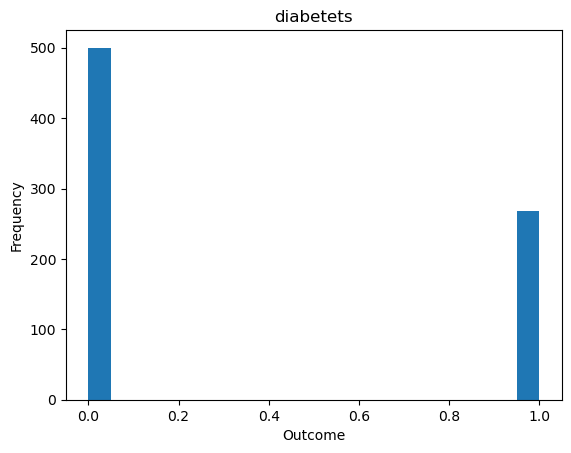

In [19]:
import matplotlib.pyplot as plt
plt.hist(df['Outcome'],bins=20)
plt.title('diabetets')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

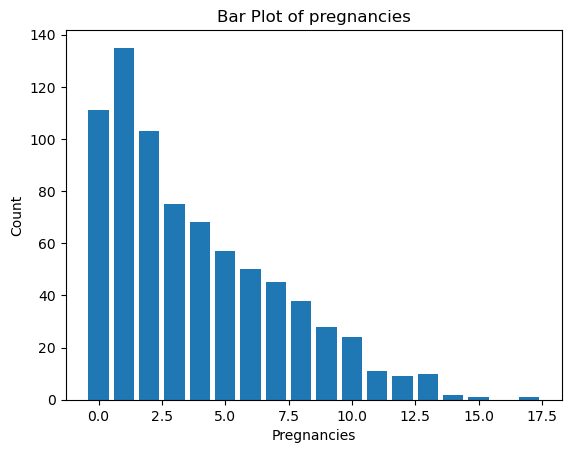

In [20]:
plt.bar(df['Pregnancies'].value_counts().index, df['Pregnancies'].value_counts())
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Bar Plot of pregnancies')
plt.show()

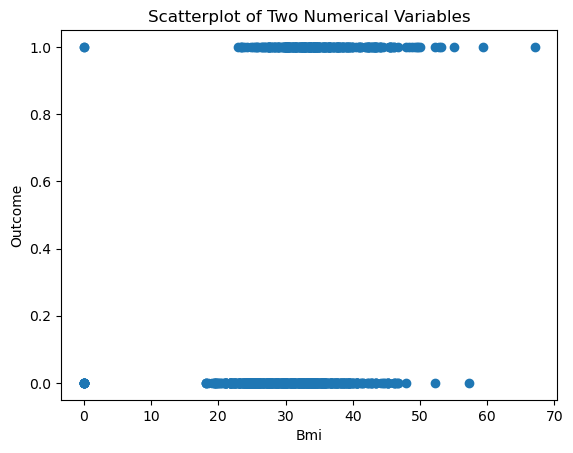

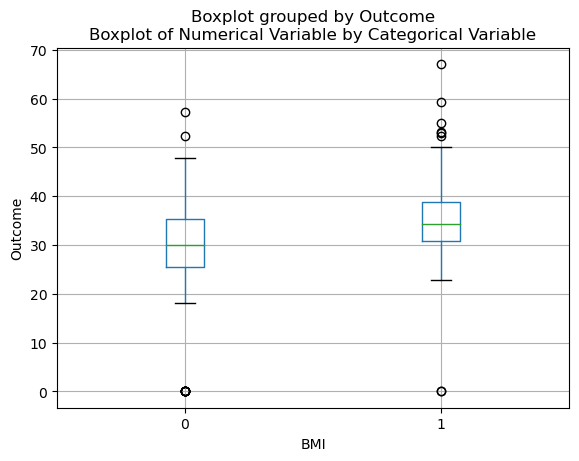

In [22]:
plt.scatter(df['BMI'], df['Outcome'])
plt.xlabel('Bmi')
plt.ylabel('Outcome')
plt.title('Scatterplot of Two Numerical Variables')
plt.show()

df.boxplot(column='BMI', by='Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('Boxplot of Numerical Variable by Categorical Variable')
plt.show()

2) Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

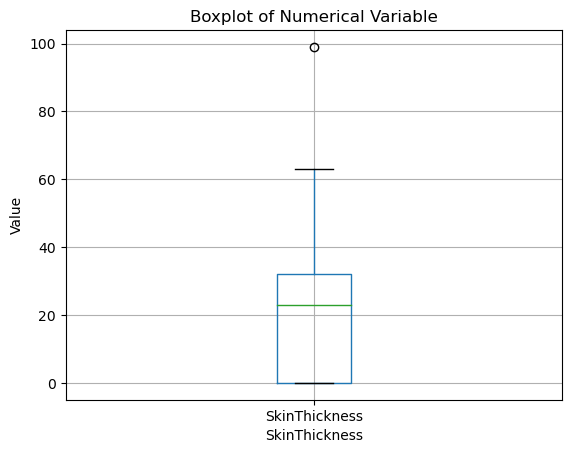

In [24]:
df.boxplot(column='SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Value')
plt.title('Boxplot of Numerical Variable')
plt.show()


In [27]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['SkinThickness'] >= Q1 - 1.5*IQR) & (df['SkinThickness'] <= Q3 + 1.5*IQR)]
from scipy import stats
z = np.abs(stats.zscore(df['SkinThickness']))
df = df[(z < 3)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


3) Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [29]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [30]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((613, 8), (154, 8), (613,), (154,))

4) Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameter = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 3, 4, 5],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4]}

In [33]:
grid_search = GridSearchCV(dtc, param_grid=parameter, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [34]:
best_dtc = grid_search.best_estimator_
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)

5) Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
y_pred=best_dtc.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [40]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
y_prob = best_dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.78      0.64      0.70        50

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

[[95  9]
 [18 32]]


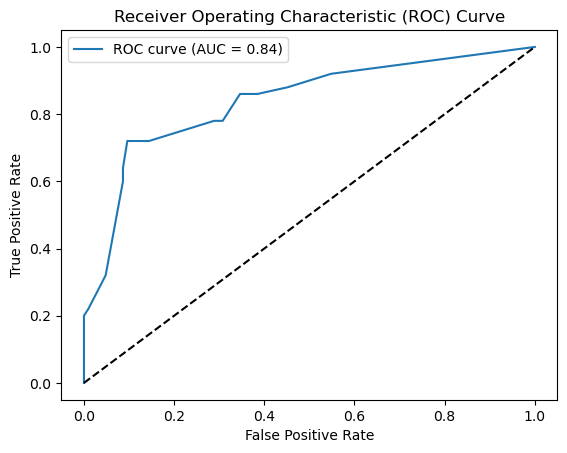

In [41]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

6) Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [43]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
dot_data = export_graphviz(dtc, out_file=None, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')
print("Feature importances:", tree.feature_importances_)

7) Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtc_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
scores = cross_val_score(dtc_clf, X, y, cv=5)
print("Average score:", scores.mean())
print('Standard Deviation',scores.std())

Average score: 0.7288260758848994
Standard Deviation 0.014987546649121638
